In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


# Load Dataset

In [42]:
boston = load_boston()

In [43]:
X = boston['data'] 
## X = boston.data syntax can also be used
Y = boston['target']
features = boston.feature_names

In [44]:
print(X.shape)
print(Y.shape)
print(features.shape)

(506, 13)
(506,)
(13,)


In [13]:
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [45]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
df = pd.DataFrame(X, columns = features)

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [46]:
## Normalize this dataset
# Each feature must have 0 mean and unit variance (1 standard deviation)

u = np.mean(X)
std = np.std(X)

X = (X - u)/std

In [33]:
df = pd.DataFrame(X, columns = features)

In [34]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.482707,-0.358746,-0.466837,-0.482751,-0.479045,-0.437455,-0.033578,-0.454574,-0.475862,1.556441,-0.377347,2.251557,-0.448443
1,-0.482563,-0.482751,-0.434045,-0.482751,-0.479520,-0.438516,0.060804,-0.448532,-0.468973,1.184426,-0.360124,2.251557,-0.419784
2,-0.482563,-0.482751,-0.434045,-0.482751,-0.479520,-0.433252,-0.061823,-0.448532,-0.468973,1.184426,-0.360124,2.223519,-0.454988
3,-0.482528,-0.482751,-0.467733,-0.482751,-0.479596,-0.434541,-0.167227,-0.440987,-0.462083,1.046643,-0.353924,2.235919,-0.462497
4,-0.482275,-0.482751,-0.467733,-0.482751,-0.479596,-0.433514,-0.109358,-0.440987,-0.462083,1.046643,-0.353924,2.251557,-0.446032


In [36]:
df.shape

(506, 13)

# Implement Functions

In [47]:
X0 = np.ones((X.shape[0], 1))

In [48]:
X = np.hstack((X0, X))

In [116]:
print(X.shape)

(506, 14)


In [117]:
X

array([[ 1.        , -0.48270736, -0.35874599, ..., -0.37734672,
         2.25155744, -0.44844287],
       [ 1.        , -0.48256276, -0.4827509 , ..., -0.36012382,
         2.25155744, -0.41978396],
       [ 1.        , -0.4825629 , -0.4827509 , ..., -0.36012382,
         2.22351855, -0.45498758],
       ...,
       [ 1.        , -0.48233231, -0.4827509 , ..., -0.3380785 ,
         2.25155744, -0.44389603],
       [ 1.        , -0.48199592, -0.4827509 , ..., -0.3380785 ,
         2.22778983, -0.43810913],
       [ 1.        , -0.48242429, -0.4827509 , ..., -0.3380785 ,
         2.25155744, -0.4284643 ]])

In [118]:
# X - Matrix (m x n) - 506 dataentry and 14 feature (X0 with bias)
# x - vector (n) - single data point (1 example) with 14 features

def hypothesis(x, theta):
    y_ = 0.0
    n = x.shape[0]
    for j in range(n):
        y_ += (theta[j]*x[j])
    return y_

# MSE - mean square error
def error(X, Y, theta):
    e = 0.0
    m = X.shape[0] ## data points
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        e += (y_ - Y[i])**2
    
    return e/m

def gradient(X, Y, theta):
    m, n = X.shape
    grad = np.zeros((n,)) 
    
    ## for n features, we will compute gradient - ΔJ(Θ)
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i], theta)
            grad[j] += (y_ - Y[i])*X[i][j]
            
    return grad/m

def gradientDescent(X, Y, learning_rate = 0.1, max_epochs = 300):
    m, n = X.shape
    theta = np.zeros((n,))
    theta_list = []
    error_list = []
    
    for i in range(max_epochs):
        e = error(X, Y, theta)
        error_list.append(e)
        
        ## gradient descent
        grad = gradient(X, Y, theta)
        for j in range(n):
            theta[j] =  theta[j] - learning_rate * grad[j]
        
        theta_list.append(theta)
        
    return theta, theta_list, error_list

In [120]:
start = time.time()
theta, theta_list, error_list = gradientDescent(X, Y)
end = time.time()

print(end-start)

105.9071261882782


In [121]:
error_list = pd.DataFrame(error_list)

In [122]:
error_list

,0
0,592.146917
1,154.079599
2,113.228953
3,102.900980
4,96.354169
...,...
295,57.199478
296,57.187827
297,57.176226
298,57.164675


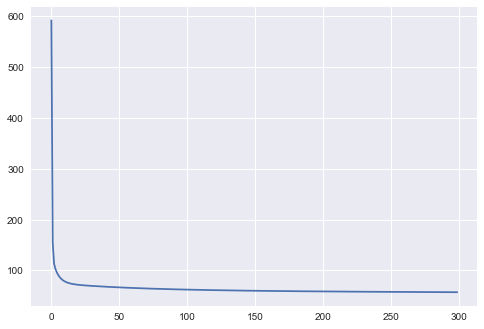

In [123]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [124]:
print(theta)

[ 7.53690851 -4.94463444  3.88450133 -4.87978886 -3.55756575 -3.62877356
 -2.58229621 -4.44335757 -3.59904976 -3.05609738 -1.95889649 -3.94815575
  2.25047645 -8.76380243]
